In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer,SnowballStemmer
from nltk import word_tokenize
from wordcloud import WordCloud
from sklearn.neural_network import MLPClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('DrugLibTrain_raw.tsv', delimiter='\t')

In [5]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [6]:
df.shape

(3107, 9)

In [7]:
df.rename(columns={'Unnamed: 0':'UniqueID'}, inplace=True)

Text(0, 0.5, 'Number of Reviews')

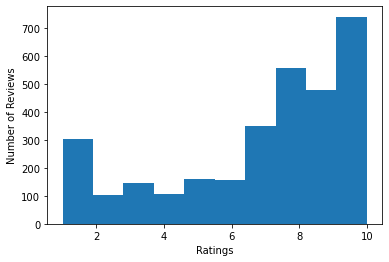

In [8]:
plt.hist(df['rating'])
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews')

In [9]:
wordcloud = WordCloud(width=800, height=800,background_color='white',min_font_size=10).generate(str(df['commentsReview']))

(-0.5, 799.5, 799.5, -0.5)

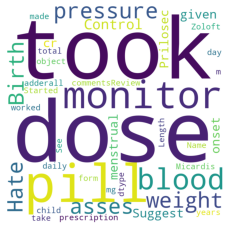

In [10]:
plt.imshow(wordcloud)
plt.axis('off')

In [11]:
df2 = df[['rating','commentsReview']]

In [12]:
df2.isnull().sum()

rating            0
commentsReview    8
dtype: int64

In [13]:
df2.shape

(3107, 2)

In [14]:
df2 = df2.dropna()

In [15]:
df2.reset_index(inplace=True)
df2.head(3)

,index,rating,commentsReview
0,0,4,"monitor blood pressure , weight and asses for ..."
1,1,1,"I Hate This Birth Control, I Would Not Suggest..."
2,2,10,I took 2 pills at the onset of my menstrual cr...


In [46]:
df['commentsReview'][12]

'This was prescribes to me for treatment for depression, seasonable disorder and hormonal irritability.   I have gone off this medication while pregnant, but have resumed to help ease depression issues.'

In [16]:
def prepro(df2):
    tokens=word_tokenize(df2)
    stemmer=SnowballStemmer('english', ignore_stopwords=True)
    stemmed=[stemmer.stem(word)for word in tokens]
    words = [word for word in stemmed if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    st = [w for w in words if not w in stop_words]
    return st

In [17]:
df2['commentsReview'] = df2['commentsReview'].apply(lambda x:prepro(x))

In [18]:
def sentiment(df2):
    df2.loc[df2.rating<4, 'Sentiment']="Negative"
    df2.loc[(df2.rating>=4) & (df2.rating<7), 'Sentiment']="Neutral"
    df2.loc[(df2.rating>=7), 'Sentiment']="Positive"
    return df2

In [19]:
df2=sentiment(df2)

C:\Users\ASHISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


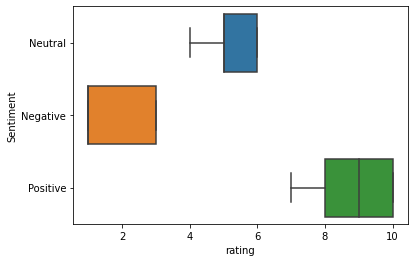

In [20]:
sns.boxplot(df2['rating'], df2['Sentiment'])
plt.show()

In [21]:
X = df2.drop('Sentiment', axis=1)
y = df2['Sentiment']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
train_xv = tf.fit_transform(X_train['commentsReview'].astype(str))
test_xv = tf.transform(X_test['commentsReview'].astype(str))

In [24]:
clf = MLPClassifier(solver='adam', alpha=0.01, activation='relu',hidden_layer_sizes=(150,75),max_iter=1000,random_state=1,batch_size=27017,
                    learning_rate_init=0.001)

In [25]:
clf.fit(train_xv,y_train)

C:\Users\ASHISH\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:542: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


MLPClassifier(alpha=0.01, batch_size=27017, hidden_layer_sizes=(150, 75),
              max_iter=1000, random_state=1)

In [26]:
y_pred=clf.predict(test_xv)

In [27]:
clf.score(test_xv,y_test)

0.6070381231671554

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 46,  25, 111],
       [ 26,  22,  91],
       [ 65,  84, 553]], dtype=int64)

In [30]:
asc = accuracy_score(y_test,y_pred)
asc

0.6070381231671554

**By Naive Baise Algorithm**

In [31]:
from sklearn.naive_bayes import MultinomialNB
SA = MultinomialNB().fit(train_xv,y_train)

In [32]:
y_pred = SA.predict(test_xv)

In [33]:
SA.score(test_xv,y_test)

0.6862170087976539

In [34]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  0,   0, 182],
       [  0,   0, 139],
       [  0,   0, 702]], dtype=int64)

In [35]:
asc = accuracy_score(y_test,y_pred)
asc

0.6862170087976539

In [47]:
SA.predict(tf.transform(['This was prescribes to me for treatment for depression, seasonable disorder and hormonal irritability.   I have gone off this medication while pregnant, but have resumed to help ease depression issues.']))

array(['Positive'], dtype='<U8')

In [44]:
SA.predict(tf.transform(['monitor blood pressure , weight and asses for resolution of fluid']))

array(['Positive'], dtype='<U8')

In [37]:
import joblib
joblib.dump(SA,'sentiment.pkl')
joblib.dump(tf,'vectorizer.pkl')

['vectorizer.pkl']